References:
1. Panduan Lab 4

In [199]:
import matplotlib.pyplot as plt
import numpy as np
import copy
import cv2

from scipy import fftpack as fp
from skimage import color
from skimage import filters
from skimage import io
from skimage import morphology
from skimage import util

## **1. [50] Noise Removal**

### Diberikan sebuah citra xray bernama noisy_xray.png. Sayangnya citra ini memiliki noise berupa bintik-bintik putih yang mengganggu di hasil x-ray

### a. [20] Bersihkan noise pada gambar di atas menggunakan morphology operator!

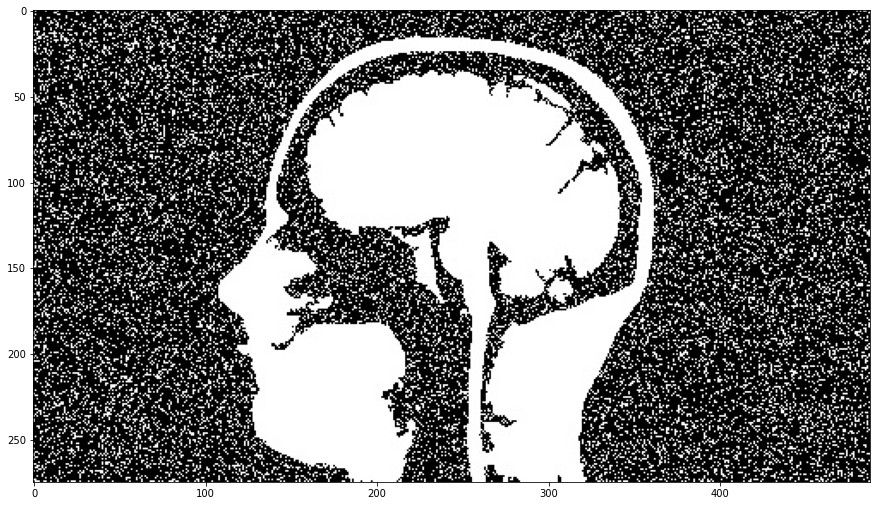

In [200]:
# Mengimpor gambar
xray_img = io.imread('Citra Tugas Lab 4/noisy_xray.jpg')
xray_img_rgb = color.gray2rgb(xray_img)

plt.figure(figsize=(15, 15))
plt.imshow(xray_img_rgb)

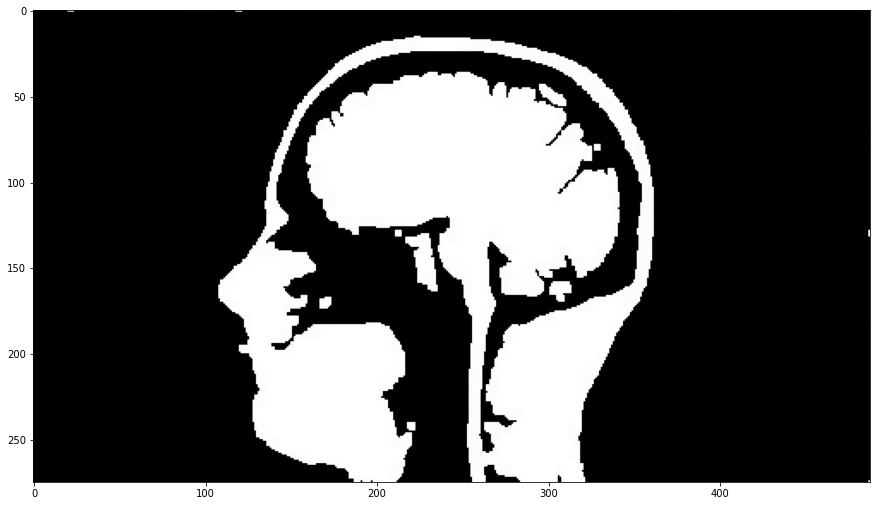

In [201]:
# Melakukan operasi morfologi Opening dengan strel persegi ukuran 5x5
strel = morphology.rectangle(4, 4)
xray_img_opening = morphology.opening(xray_img, strel)
xray_img_opening_rgb = color.gray2rgb(xray_img_opening)

plt.figure(figsize=(15, 15))
plt.imshow(xray_img_opening_rgb)

### b. [15] Ceritakan mengapa Anda mengerjakan poin a dengan cara tersebut!

Karena pendekatan Opening memiliki karakteristik yakni menggelapkan gambar dan mengaburkan detail-detail kecil. Maka, pendekatan Opening sesuai apabila ingin menghilangkan noise.

### c. [15] Sebelumnya Anda pernah melakukan noise removal dengan menggunakan median dan mean filter di lab 1. Jabarkan bagaimana perbedaan pada hasilnya jika dibandingkan dengan noise removal di lab 4 ini?

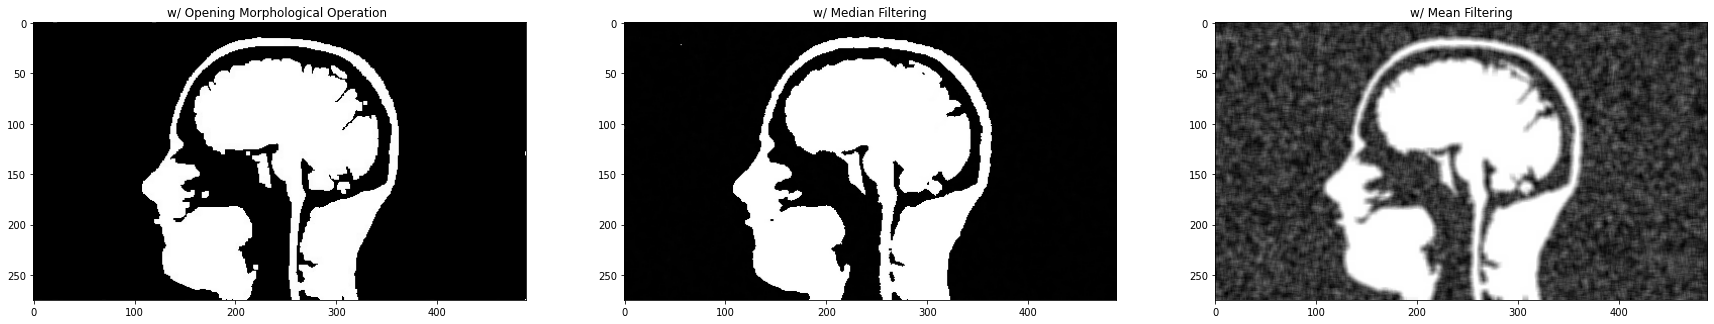

In [202]:
xray_img_median_filtered = filters.rank.median(xray_img, selem=morphology.square(6))
xray_img_mean_filtered = filters.rank.mean(xray_img, selem=morphology.square(6))

xray_img_median_filtered_rgb = color.gray2rgb(xray_img_median_filtered)
xray_img_mean_filtered_rgb = color.gray2rgb(xray_img_mean_filtered)

plt.figure(figsize=(30, 30))

plt.subplot(1, 3, 1)
plt.imshow(xray_img_opening_rgb, vmin=0, vmax=255)
plt.title('w/ Opening Morphological Operation ')

plt.subplot(1, 3, 2)
plt.imshow(xray_img_median_filtered_rgb, vmin=0, vmax=255)
plt.title('w/ Median Filtering')

plt.subplot(1, 3, 3)
plt.imshow(xray_img_mean_filtered_rgb, vmin=0, vmax=255)
plt.title('w/ Mean Filtering')

plt.show()

Dengan menggunakan Mask Filtering Median & Mean dengan kernel 6x6, dan operasi Opening dengan strel ukuran 4x4, didapatkan bahwa citra yang dilakukan operasi Opening & Median Filtering yang berhasil mencapai tujuan yakni menghilangkan noise. Sedangkan citra yang dilakukan operasi Mean Filtering berhasil menjadi lebih smooth, tetapi noise-nya masih ada.

Perbedaan pada citra yang dilakukan operasi Opening & Median Filtering yakni terletak pada edgesnya. Edge pada operasi Opening terlihat bahwa ada beberapa bagian yang tergerus akibat operasi erosi, dan edge yang sedikit kurang smooth dibanding citra yang diolah dengan Median Filtering.

## 2. [50] Pesan rahasia

### Anda mendapat pesan rahasia yang terdiri dari dua citra. Untuk dapat membaca pesan ini, Anda harus menerapkan morphological image processing pada masing-masing citra, kemudian menggabungkannya menjadi satu. Berikut petunjuknya.

### a. [30] Lakukan dilatasi terhadap citra misteri1.jpg dan misteri2.jpg dengan kernel yang tepat. Hanya ada satu pasang kernel yang benar untuk membuka pesan rahasia. Berikut adalah pilihan kernel yang bisa Anda coba:

- {diamond(25), diamond(17)}
- {rectangle(12, 25), rectangle(20, 10)}
- {rectangle(46, 1), rectangle(1, 44)}
- {disk(13), disk(19)}



In [203]:
# Mengimpor gambar misteri1 dan misteri2
misteri1_img = io.imread('Citra Tugas Lab 4/misteri1.jpg')
misteri2_img = io.imread('Citra Tugas Lab 4/misteri2.jpg')

Text(0.5, 1.0, 'Misteri2 dengan kombinasi a')

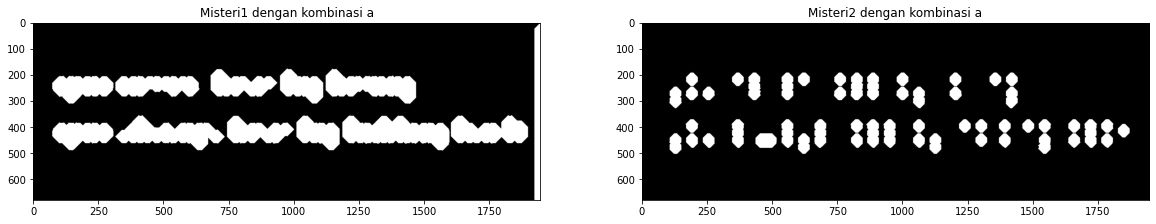

In [204]:
# Menggunakan kombinasi a
strel_a1 = morphology.diamond(25)
strel_a2 = morphology.diamond(17)

misteri1_img_a1 = morphology.dilation(misteri1_img, strel_a1)
misteri1_img_a2 = morphology.dilation(misteri2_img, strel_a2)

plt.figure(figsize=(20, 20))

plt.subplot(1, 2, 1)
plt.imshow(misteri1_img_a1, cmap="gray")
plt.title('Misteri1 dengan kombinasi a')

plt.subplot(1, 2, 2)
plt.imshow(misteri1_img_a2, cmap="gray")
plt.title('Misteri2 dengan kombinasi a')

Text(0.5, 1.0, 'Misteri2 dengan kombinasi b')

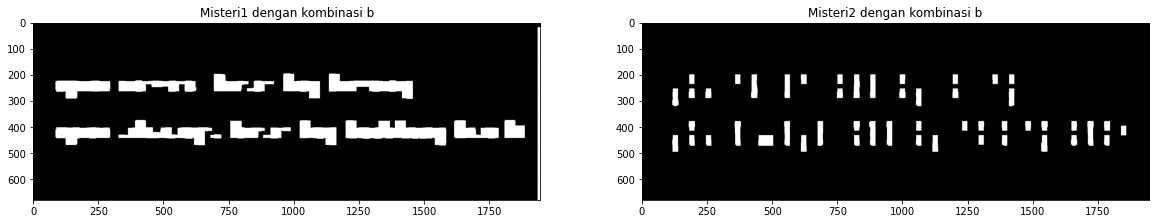

In [205]:
# Menggunakan kombinasi b
strel_b1 = morphology.rectangle(12, 25)
strel_b2 = morphology.rectangle(20, 10)

misteri1_img_b1 = morphology.dilation(misteri1_img, strel_b1)
misteri1_img_b2 = morphology.dilation(misteri2_img, strel_b2)

plt.figure(figsize=(20, 20))

plt.subplot(1, 2, 1)
plt.imshow(misteri1_img_b1, cmap="gray")
plt.title('Misteri1 dengan kombinasi b')

plt.subplot(1, 2, 2)
plt.imshow(misteri1_img_b2, cmap="gray")
plt.title('Misteri2 dengan kombinasi b')

Text(0.5, 1.0, 'Misteri2 dengan kombinasi c')

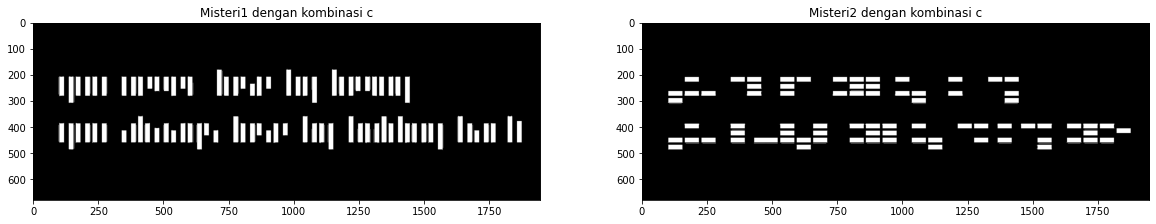

In [206]:
# Menggunakan kombinasi c
strel_c1 = morphology.rectangle(46, 1)
strel_c2 = morphology.rectangle(1, 44)

misteri1_img_c1 = morphology.dilation(misteri1_img, strel_c1)
misteri1_img_c2 = morphology.dilation(misteri2_img, strel_c2)

plt.figure(figsize=(20, 20))

plt.subplot(1, 2, 1)
plt.imshow(misteri1_img_c1, cmap="gray")
plt.title('Misteri1 dengan kombinasi c')

plt.subplot(1, 2, 2)
plt.imshow(misteri1_img_c2, cmap="gray")
plt.title('Misteri2 dengan kombinasi c')

Text(0.5, 1.0, 'Misteri2 dengan kombinasi d')

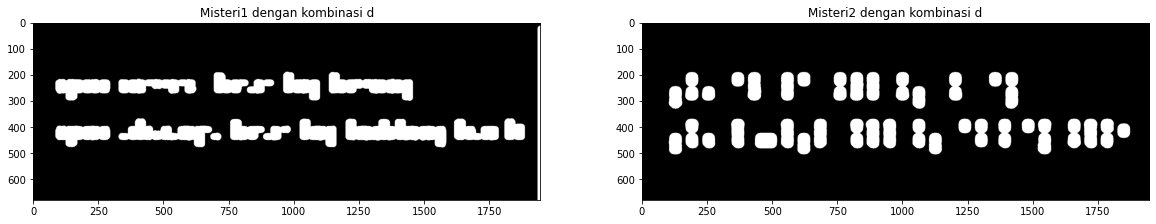

In [207]:
# Menggunakan kombinasi d
strel_d1 = morphology.disk(13)
strel_d2 = morphology.disk(19)

misteri1_img_d1 = morphology.dilation(misteri1_img, strel_d1)
misteri1_img_d2 = morphology.dilation(misteri2_img, strel_d2)

plt.figure(figsize=(20, 20))

plt.subplot(1, 2, 1)
plt.imshow(misteri1_img_d1, cmap="gray")
plt.title('Misteri1 dengan kombinasi d')

plt.subplot(1, 2, 2)
plt.imshow(misteri1_img_d2, cmap="gray")
plt.title('Misteri2 dengan kombinasi d')

### b. [13] Gabungkan kedua citra hasil dilatasi poin a! Jika kernel yang Anda pilih benar, pesan rahasia akan terlihat.

Melihat dari keempat kombinasi, yang paling menunjukkan bahwa apabila kedua gambar dikombinasikan akan bermakna adalah kombinasi C. Maka, apabila dikombinasikan, akan menjadi sebagai berikut:

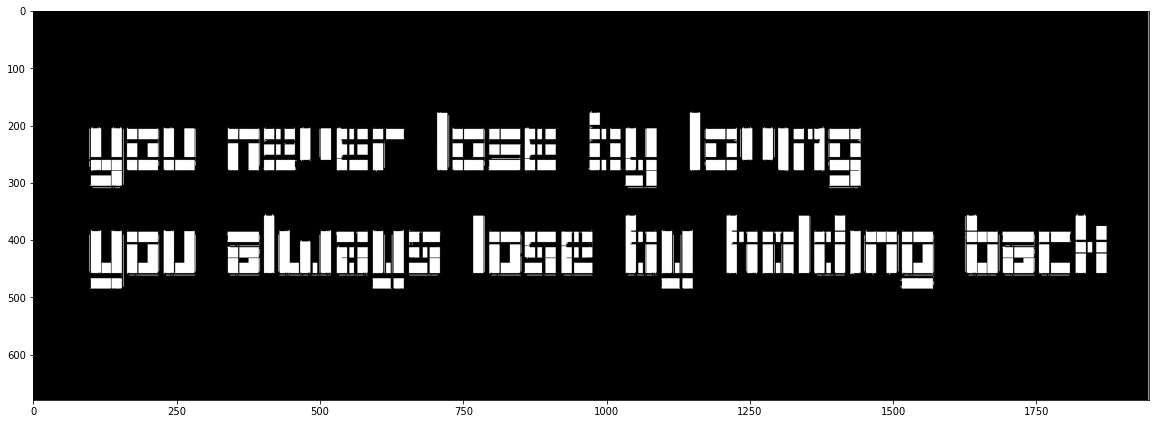

In [208]:
misteri_images_combined = (misteri1_img_c1 + misteri1_img_c2)

plt.figure(figsize=(20, 20))
plt.imshow(misteri_images_combined, cmap="gray")

### c. [7] Tuliskan pesan rahasia yang Anda dapatkan!

you never lose by loving

you always lose by holding back